**EXPLORATORY DATA ANALYSIS**

Here I am doing basic EDA to find which features are highly correlated and affect the demand. 

In [6]:
from google.colab import files
uploaded = files.upload()

Saving tvm all data.csv to tvm all data.csv


In [7]:
import pandas as pd
demand_data = pd.read_csv("tvm all data.csv")

In [8]:
demand_data.head(5)

,Date_Time,Relative Humidity in %,Rainfall in mm,Temperature in Degree C,Radiation value in MJ/m^2,Wind speed in kmph,Kerala Holidays,Day of the week,Average Demand of Prev. Day,Average Demand of Prev. week,Demand during this hour,Hourly Avg. of Prev. week,Demand in MW
0,01-01-2017 00:00,87.0,0.0,25.5,NaN,NaN,True,1.0,2342.19125,2342.19125,2398.66,2398.66,2398.66
1,01-01-2017 01:00,85.0,0.0,26.2,NaN,NaN,True,1.0,2342.19125,2342.19125,2238.83,2238.83,2238.83
2,01-01-2017 02:00,91.0,0.0,25.6,NaN,NaN,True,1.0,2342.19125,2342.19125,2161.29,2161.29,2161.29
3,01-01-2017 03:00,93.0,0.0,25.3,NaN,0.0,True,1.0,2342.19125,2342.19125,2094.65,2094.65,2094.65
4,01-01-2017 04:00,93.0,0.0,24.4,NaN,NaN,True,1.0,2342.19125,2342.19125,2064.19,2064.19,2064.19


**Findling Missing Values**

In [9]:
print(demand_data["Demand in MW"][pd.isna(demand_data[ "Rainfall in mm"])].count()) # we have 3198 missing values for rainfall
print(demand_data["Demand in MW"][pd.isna(demand_data[ "Relative Humidity in %"])].count()) # we have 11948 missing values. So we can drop this column from our final data set
print(demand_data["Demand in MW"][pd.isna(demand_data[ "Temperature in Degree C"])].count()) # we have 15609 missing values in  temperature column, so we can get rid of that as well
print(demand_data["Demand in MW"][pd.isna(demand_data[ "Radiation value in MJ/m^2"])].count()) # we have 17372 missing values in  temperature column, so we can get rid of that as well

3198
11948
15609
17372


In [10]:
final = demand_data.drop(columns = ["Relative Humidity in %", "Temperature in Degree C", "Radiation value in MJ/m^2" , "Wind speed in kmph"])
final.head(5)

,Date_Time,Rainfall in mm,Kerala Holidays,Day of the week,Average Demand of Prev. Day,Average Demand of Prev. week,Demand during this hour,Hourly Avg. of Prev. week,Demand in MW
0,01-01-2017 00:00,0.0,True,1.0,2342.19125,2342.19125,2398.66,2398.66,2398.66
1,01-01-2017 01:00,0.0,True,1.0,2342.19125,2342.19125,2238.83,2238.83,2238.83
2,01-01-2017 02:00,0.0,True,1.0,2342.19125,2342.19125,2161.29,2161.29,2161.29
3,01-01-2017 03:00,0.0,True,1.0,2342.19125,2342.19125,2094.65,2094.65,2094.65
4,01-01-2017 04:00,0.0,True,1.0,2342.19125,2342.19125,2064.19,2064.19,2064.19


In [11]:

time = pd.to_datetime(final["Date_Time"]).dt.time
final.insert(1,"Time", time, True)
final

,Date_Time,Time,Rainfall in mm,Kerala Holidays,Day of the week,Average Demand of Prev. Day,Average Demand of Prev. week,Demand during this hour,Hourly Avg. of Prev. week,Demand in MW
0,01-01-2017 00:00,00:00:00,0.0,True,1.0,2342.19125,2342.191250,2398.66,2398.660000,2398.66
1,01-01-2017 01:00,01:00:00,0.0,True,1.0,2342.19125,2342.191250,2238.83,2238.830000,2238.83
2,01-01-2017 02:00,02:00:00,0.0,True,1.0,2342.19125,2342.191250,2161.29,2161.290000,2161.29
3,01-01-2017 03:00,03:00:00,0.0,True,1.0,2342.19125,2342.191250,2094.65,2094.650000,2094.65
4,01-01-2017 04:00,04:00:00,0.0,True,1.0,2342.19125,2342.191250,2064.19,2064.190000,2064.19
...,...,...,...,...,...,...,...,...,...,...
26275,12/31/2019 19:00,19:00:00,NaN,False,NaN,3014.77000,2975.092679,3682.16,3545.731429,3740.26
26276,12/31/2019 20:00,20:00:00,NaN,False,NaN,3014.77000,2975.092679,3630.50,3504.540000,3616.52
26277,12/31/2019 21:00,21:00:00,NaN,False,NaN,3014.77000,2975.092679,3554.56,3459.067143,3555.91
26278,12/31/2019 22:00,22:00:00,NaN,False,NaN,3014.77000,2975.092679,3540.41,3432.617143,3413.72


**Visualizing Data to draw insights**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


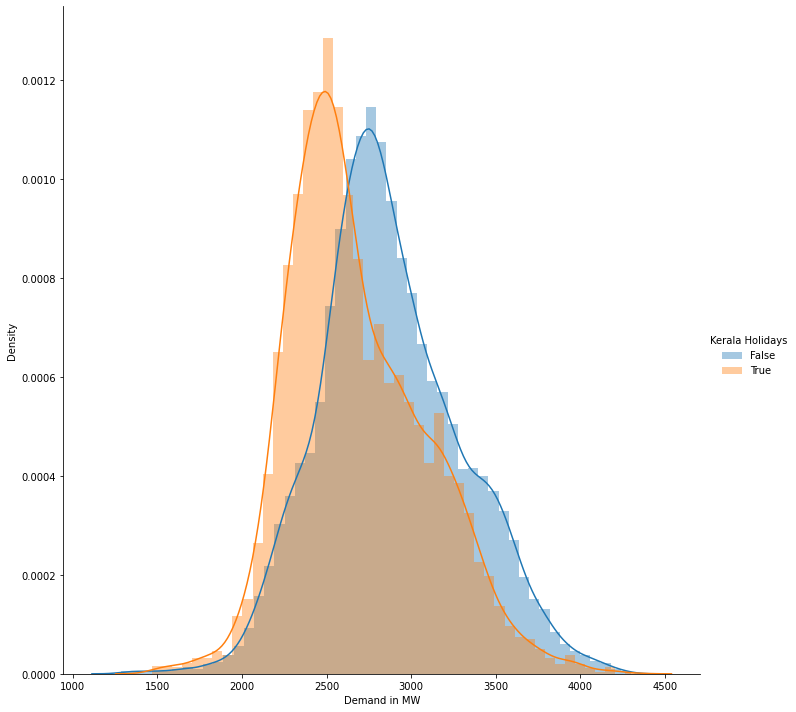

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
newplot = sns.FacetGrid(final, hue="Kerala Holidays", size=10);
newplot.map(sns.distplot, "Demand in MW"); 
newplot.add_legend();
plt.show();

In [13]:
print("The average demand on a holiday is", final["Demand in MW"][final["Kerala Holidays"] == True].mean())
print("The average demand on a non -holiday is", final["Demand in MW"][final["Kerala Holidays"] == False].mean())

The average demand on a holiday is 2680.8731966145874
The average demand on a non -holiday is 2874.945369487503


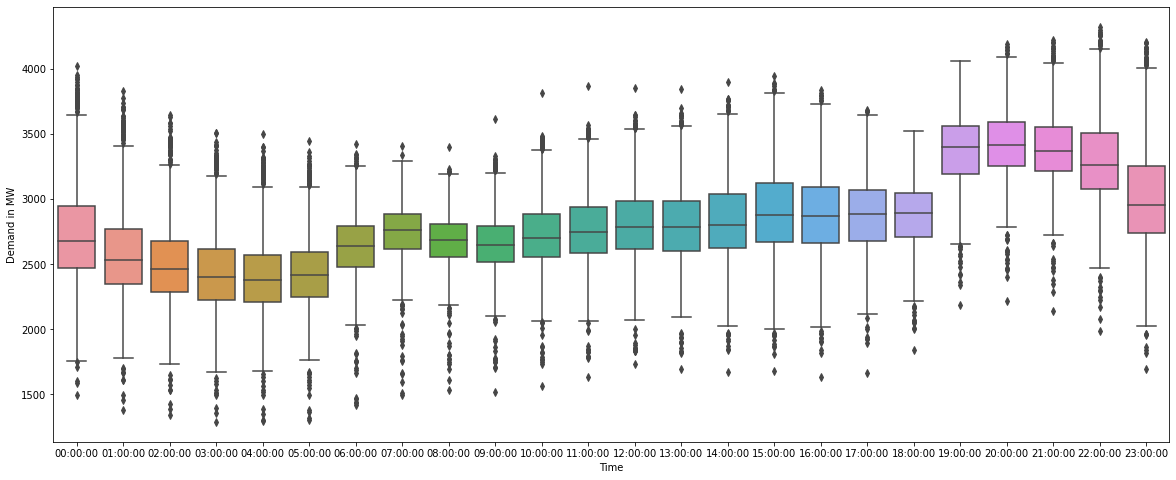

In [14]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Time',y='Demand in MW', data=final)
plt.show()

We can see here that time of the day has a big significance on demand during that time. 





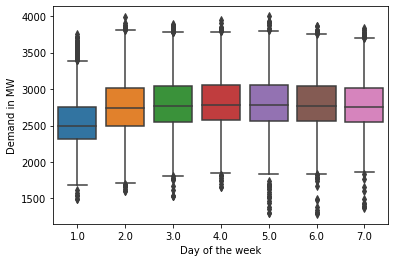

In [15]:
sns.boxplot(x='Day of the week',y='Demand in MW', data=final)
plt.show()

We can also see that day of the week also shows a change in demand(Sunday has lower demand than other days)

**Building the model**

1.   Data Cleaning and imputing missing values
2.   Splitting between input and output data
3.  Column Standardization of data
4.   Splitting into train test data
5. Applying linear regression on our data
6. Error Calculations and Observations



In [16]:
#Creating input data(X) and output data(Y)
import numpy as np
X = final.drop(["Date_Time"], axis = 1)
Y = final["Demand in MW"]
X["Time"] = X["Time"].map(str)
time_array = np.array(X["Time"])
for i in range(len(time_array)):
  time_array[i] = time_array[i][0:2]
X["Time"] = time_array
day_week = pd.get_dummies(X['Day of the week'],drop_first=True)  
X = pd.concat([X, day_week], axis = 1)
X = X.drop(["Day of the week"], axis = 1)

In [17]:
X

,Time,Rainfall in mm,Kerala Holidays,Average Demand of Prev. Day,Average Demand of Prev. week,Demand during this hour,Hourly Avg. of Prev. week,Demand in MW,2.0,3.0,4.0,5.0,6.0,7.0
0,00,0.0,True,2342.19125,2342.191250,2398.66,2398.660000,2398.66,0,0,0,0,0,0
1,01,0.0,True,2342.19125,2342.191250,2238.83,2238.830000,2238.83,0,0,0,0,0,0
2,02,0.0,True,2342.19125,2342.191250,2161.29,2161.290000,2161.29,0,0,0,0,0,0
3,03,0.0,True,2342.19125,2342.191250,2094.65,2094.650000,2094.65,0,0,0,0,0,0
4,04,0.0,True,2342.19125,2342.191250,2064.19,2064.190000,2064.19,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,19,NaN,False,3014.77000,2975.092679,3682.16,3545.731429,3740.26,0,0,0,0,0,0
26276,20,NaN,False,3014.77000,2975.092679,3630.50,3504.540000,3616.52,0,0,0,0,0,0
26277,21,NaN,False,3014.77000,2975.092679,3554.56,3459.067143,3555.91,0,0,0,0,0,0
26278,22,NaN,False,3014.77000,2975.092679,3540.41,3432.617143,3413.72,0,0,0,0,0,0


In [18]:
new_data = {}
time_demand = []
g = X.groupby("Time")
for time, time_df in g:
    new_data[time] = time_df["Demand in MW"].mean()
print(new_data)
for time1 in np.array(X["Time"]):
  time_demand.append(new_data[time1])
print(len(time_demand))  
X["time_demand"] = time_demand
X = X.drop(["Demand in MW", "Time"], axis = 1)

      

{'00': 2749.8077077625576, '01': 2597.345159817352, '02': 2516.0270410958883, '03': 2450.3982922374416, '04': 2418.984593607303, '05': 2446.415360730593, '06': 2638.3169223744303, '07': 2745.433954337898, '08': 2679.2213515981753, '09': 2657.4357716894983, '10': 2720.7520000000036, '11': 2763.7982922374435, '12': 2808.100757990863, '13': 2805.1392694063907, '14': 2837.392913242009, '15': 2907.9492694063897, '16': 2884.950429223743, '17': 2871.424447488589, '18': 2878.9285570776246, '19': 3374.798520547945, '20': 3420.8396073059394, '21': 3393.415552511417, '22': 3313.102045662102, '23': 3029.7800639269467}
26280


In [19]:
#imputing missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=100, random_state=0,min_value=0.0)
X = imp.fit_transform(X)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [20]:
#applying standard scalar to scale all the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_demand_data = scaler.fit_transform(X, Y)


In [21]:
#splitting into training and testing data 
import sklearn.model_selection as cv
X_train, X_test, Y_train, Y_test = cv.train_test_split(new_demand_data, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17607, 13)
(8673, 13)
(17607,)
(8673,)


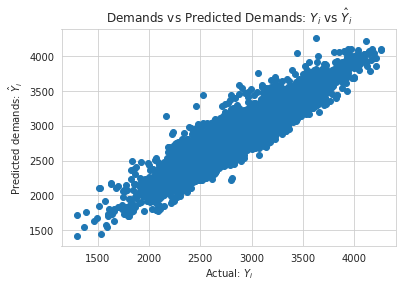

In [41]:
#Applying linear regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual: $Y_i$")
plt.ylabel("Predicted demands: $\hat{Y}_i$")
plt.title("Demands vs Predicted Demands: $Y_i$ vs $\hat{Y}_i$")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


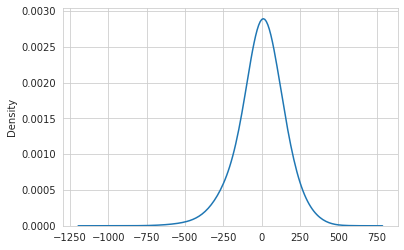

In [42]:
# pdf of errors
# we can see that most errors lie near 0 and almost all error values lie between -500 to 500
delta_y = Y_test - Y_pred;
import seaborn as sns;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


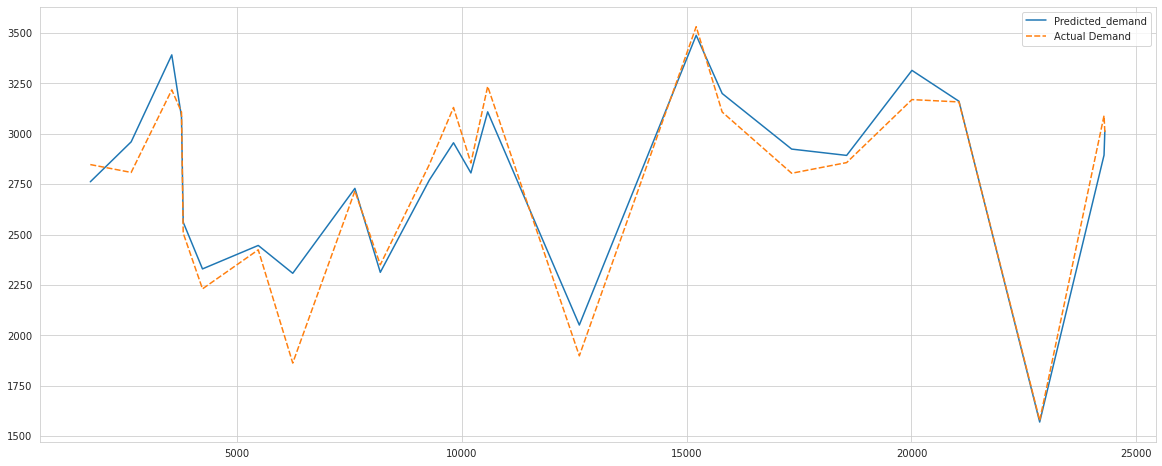

In [44]:
data = {"Predicted_demand": Y_pred, "Actual Demand" : Y_test}
newdata = pd.DataFrame(data)
plt.figure(figsize=(20,8))
toplot = newdata[0:24]
sns.lineplot(data = toplot)
plt.show()

In [24]:
#MSE error obtained - 170MW
from sklearn.metrics import mean_squared_error
e_value = mean_squared_error(Y_test, Y_pred, squared = False)
print(e_value)

141.82357873604008


In [25]:
# Mean absolute error obtained - 125MW
from sklearn.metrics import mean_absolute_error
e2_value = mean_absolute_error(Y_test, Y_pred,)
print(e2_value)

104.90848163780733


In [26]:
from sklearn.metrics import mean_absolute_percentage_error
e3_value = mean_absolute_percentage_error(Y_test, Y_pred,)
print(e3_value)

0.03843214365001244


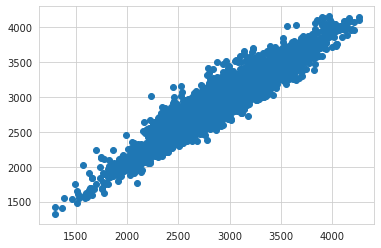

In [27]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
plt.scatter(Y_test,Y_pred)
plt.show()

In [28]:
#MSE error obtained - 170MW
from sklearn.metrics import mean_squared_error
e_value = mean_squared_error(Y_test, Y_pred, squared = False)
print(e_value)

106.26888746047959


In [29]:
from sklearn.metrics import mean_absolute_percentage_error
e3_value = mean_absolute_percentage_error(Y_test, Y_pred,)
print(e3_value)

0.026653135131478996


In [32]:
data = {"Predicted_demand": Y_pred, "Actual Demand" : Y_test}
newdata = pd.DataFrame(data)

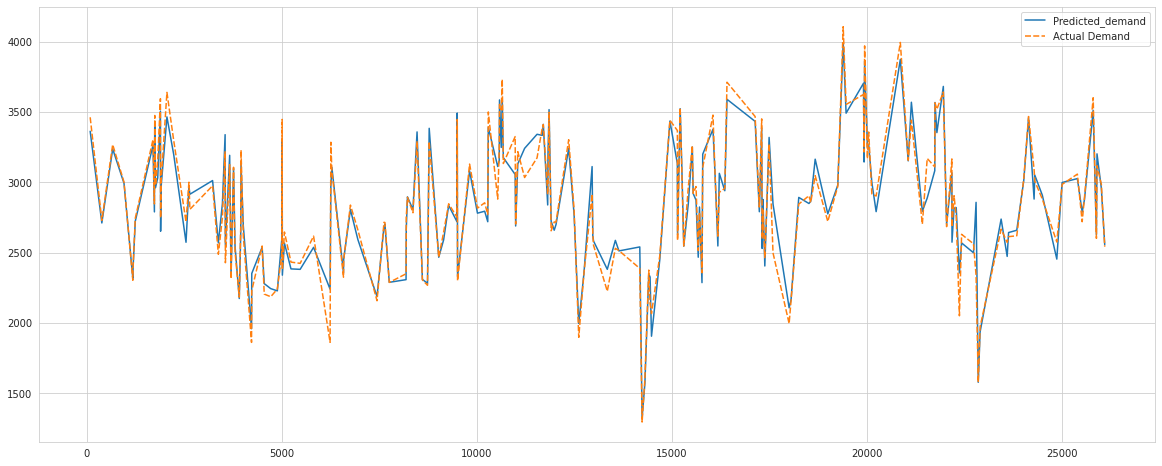

In [40]:
plt.figure(figsize=(20,8))
toplot = newdata[0:200]
sns.lineplot(data = toplot)
plt.show()